# Introduction to NLP Fundamentals in TensorFlow

NLP has the goal of deriving information out of natural language (could be sequences text or speech)

Another common term for NLP problems is sequence to sequence problems (seq2seq).

## Check for GPU

In [1]:
!nvidia-smi -L

/bin/bash: nvidia-smi: command not found


## Get helper functions

In [2]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

# Import series of helper functions for the notebook

from helper_functions import unzip_data, create_tensorboard_callback, plot_loss_curves, compare_historys

--2023-06-29 10:03:38--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-06-29 10:03:38 (66.7 MB/s) - ‘helper_functions.py’ saved [10246/10246]



## Get a text dataset

The dataset we're going to be using is Kaggle's introduction to NLP dataset (text samples of Tweets labelled as diaster or not diaster).

See the original source here: [Kaggle Link](https://www.kaggle.com/c/nlp-gettting-started)

In [3]:
!wget https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip


# Unzip data

unzip_data("nlp_getting_started.zip")



--2023-06-29 10:03:48--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.6.128, 74.125.124.128, 172.217.212.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.6.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.007s  

2023-06-29 10:03:48 (79.7 MB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



## Visualizing  a text dataset

To visualize our text samples, we first have to read the in, one way to do so would be to use Python: [Link](https://realpython.com/read-write-files-python)

But I prefer to get visual straight away.

So another way to do this is to use pandas...

In [4]:
import pandas as pd

train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [5]:
# Shuffle training dataframe
train_df_shuffled = train_df.sample(frac=1, random_state = 42)
train_df_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [6]:
# How many examples of each class

train_df.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [7]:
# How many total samples?
len(train_df), len(test_df)

(7613, 3263)

In [8]:
# Let's visualize some random training examples

import random

random_index = random.randint(0, len(train_df)-5) # create random indexes not higher than the total number of samples

for row in train_df_shuffled[["text", "target"]][random_index:random_index+5].itertuples():
  _, text, target = row
  print(f"Target: {target}", "(real diaster)" if target >0 else "(not real diaster)")
  print(f"Text:\n{text}\n")
  print("---\n")


Target: 1 (real diaster)
Text:
So much shit has happened today wtf idk how I survive thruuu it all

---

Target: 1 (real diaster)
Text:
TV: Vitaly Churkin Briliantly Exposes the Hypocrisy of the Ukraine's FM Klimkin About the MH17 Disaster http://t.co/tt4kVmvuJq

---

Target: 0 (not real diaster)
Text:
Black Friday turns Bloody (would rather be shopping) http://t.co/l0pmmtZLwP  #mystery

---

Target: 0 (not real diaster)
Text:
I just collapsed in my bed ugh I'm exhausted

---

Target: 1 (real diaster)
Text:
US Navy Sidelines 3 Newest Subs - http://t.co/guvTIzyCHE: DefenseNews.comUS Navy Sidelines 3 Newest SubsD... http://t.co/SY2WhXT0K5 #navy

---



## Split data into training and validation sets

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
# Use train_test_split to split training data into training and validation sets

train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_df_shuffled["text"].to_numpy(),
                                                                            train_df_shuffled["target"].to_numpy(),
                                                                            test_size=0.1, # use 10% of training data for validation split
                                                                            random_state = 42)

In [11]:
# Check the lengths

len(train_sentences), len(train_labels), len(val_sentences), len(val_labels)


(6851, 6851, 762, 762)

In [12]:
# Check the first 10 samples

train_sentences[:10], train_labels[:10]

(array(['@mogacola @zamtriossu i screamed after hitting tweet',
        'Imagine getting flattened by Kurt Zouma',
        '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
        "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
        'Somehow find you and I collide http://t.co/Ee8RpOahPk',
        '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
        'destroy the free fandom honestly',
        'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
        '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
        'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
       dtype=object),
 array([0,

## Converting text into numbers

When dealing with a text problem, one of the first things you'll have to do before you can build a model is to convert your text to numbers.

There are a few ways to this, namely:

* Tokenziation - direct mapping of token (a token could be a word or a character) to number
* Embedding - create a matrix of feature vector for each token (the size of the feature vector can be defined and this embedding can be learned)

### Text vectorization (tokenization)

In [13]:
train_sentences[:5]

array(['@mogacola @zamtriossu i screamed after hitting tweet',
       'Imagine getting flattened by Kurt Zouma',
       '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
       "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
       'Somehow find you and I collide http://t.co/Ee8RpOahPk'],
      dtype=object)

In [14]:
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization # after TensorFlow 2.6

# Before TensorFlow 2.6
# from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
# Note: in TensorFlow 2.6+, you no longer need "layers.experimental.preprocessing"
# you can use: "tf.keras.layers.TextVectorization", see https://github.com/tensorflow/tensorflow/releases/tag/v2.6.0 for more

# Use the default TextVectorization variables
text_vectorizer = TextVectorization(max_tokens=None, # how many words in the vocabulary (all of the different words in your text)
                                    standardize="lower_and_strip_punctuation", # how to process text
                                    split="whitespace", # how to split tokens
                                    ngrams=None, # create groups of n-words?
                                    output_mode="int", # how to map tokens to numbers
                                    output_sequence_length=None) # how long should the output sequence of tokens be?
                                    # pad_to_max_tokens=True) # Not valid if

In [15]:
# Find the average number of tokens (words) in the training tweets

round(sum([len(i.split()) for i in train_sentences])/len(train_sentences))

15

In [16]:
# Setup text vectorization variables

max_vocab_length = 10000 # max number of words to have in our vocabulary
max_length = 15 # max length our sequences will be (e.g. how many words from a Tweet does a model see?)

text_vectorizer = tf.keras.layers.TextVectorization(max_tokens = max_vocab_length,
                                                    output_mode = "int",
                                                    output_sequence_length=max_length)

In [17]:
# Fit the text vectorizer to the training

text_vectorizer.adapt(train_sentences)

In [18]:
train_sentences[:]

array(['@mogacola @zamtriossu i screamed after hitting tweet',
       'Imagine getting flattened by Kurt Zouma',
       '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
       ...,
       'Near them on the sand half sunk a shattered visage lies... http://t.co/0kCCG1BT06',
       "kesabaran membuahkan hasil indah pada saat tepat! life isn't about waiting for the storm to pass it's about learning to dance in the rain.",
       "@ScottDPierce @billharris_tv @HarrisGle @Beezersun I'm forfeiting this years fantasy football pool out of fear I may win n get my ass kicked"],
      dtype=object)

In [19]:
# Create a sample sentence and tokenize it

sample_sentence = "There's a flood in my street!"

text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[264,   3, 232,   4,  13, 698,   0,   0,   0,   0,   0,   0,   0,
          0,   0]])>

In [20]:
# Choose a random sentence from the training dataset  and tokenize it

random_sentence = random.choice(train_sentences)

print(f"Original text:\n {random_sentence}\
                          \n\nVectorized version:")
text_vectorizer([random_sentence])

Original text:
 I entered to #win the ENTIRE set of butterLONDON Lip Crayons via @be_ram0s. - Go enter! #bbloggers http://t.co/DsB3lDfuxU                          

Vectorized version:


<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[   8, 3025,    5,  798,    2,  855,  284,    6,    1, 2895,    1,
          49,    1,  112, 3026]])>

In [21]:
# Get the unique words in the vocabulary

words_in_vocab  = text_vectorizer.get_vocabulary() # get all the unique words in our training data
top_5_words = words_in_vocab[:5] # get the most common words
bottom_5_words = words_in_vocab[-5:] # get the least common words

print(f"Number of words in vocab: {len(words_in_vocab)}")
print(f"5 most common words: {top_5_words}")
print(f"5 least common words: {bottom_5_words}")

Number of words in vocab: 10000
5 most common words: ['', '[UNK]', 'the', 'a', 'in']
5 least common words: ['pages', 'paeds', 'pads', 'padres', 'paddytomlinson1']


### Creating an Embedding using an Embedding Layer

To make our embedding, we're going to use Tensorflow's embedding layer:

[Link](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Embedding)

The parameters we care most about for our embedding layer:

* `input_dim` = the size of vocabulary
* `output_dim` = the size of the output embedding vector, for example, a value of 100 would mean each token gets represented by a vector 100 long
* `input_length` = length of the sequences being passed to the embedding layer

In [22]:
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim = max_vocab_length, # set input shape
                             output_dim = 128, # output shape
                             input_length = max_length, # how long is each input
                             embeddings_initializer = "uniform"
                             )

embedding

In [23]:
# Get a random sentence from the training set

random_sentence = random.choice(train_sentences)
print(f"Original text:\n {random_sentence}\
                      \n\nEmbedded version:")

# Embed the random sentence (turn it into dense vectors of fixed size)

sample_embed = embedding(text_vectorizer([random_sentence]))
sample_embed

Original text:
 Guaranteed been bitten by some mutant mosquito my ankle has blown up. Little cunts                      

Embedded version:


<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[ 4.0624406e-02, -2.8311050e-02,  2.6193116e-02, ...,
         -3.4541439e-02,  3.9314833e-02, -9.5728785e-04],
        [ 3.3349063e-02, -2.2153631e-03, -4.1068316e-02, ...,
          1.6691450e-02, -4.3348361e-02, -4.3616440e-02],
        [ 9.0355799e-04, -4.9045037e-02,  9.4919093e-03, ...,
         -2.1791626e-02,  3.6937777e-02, -2.7103102e-02],
        ...,
        [ 4.6858788e-03, -4.5590043e-02,  2.1394972e-02, ...,
          3.1051707e-02, -1.9055450e-02, -2.0601166e-02],
        [-4.7028389e-02,  2.1024909e-02, -3.8627647e-02, ...,
          1.7568815e-02, -1.9363785e-02, -2.8013432e-02],
        [ 4.6565298e-02,  9.9759810e-03,  3.9680004e-03, ...,
         -4.1787256e-02, -2.8497100e-02, -4.7363341e-05]]], dtype=float32)>

In [24]:
# Check out a single token's embedding

sample_embed[0][0], sample_embed[0][0].shape, random_sentence

(<tf.Tensor: shape=(128,), dtype=float32, numpy=
 array([ 0.04062441, -0.02831105,  0.02619312, -0.02084789, -0.03950028,
         0.03680788,  0.04721582, -0.03604221, -0.00073731,  0.01213522,
         0.02067149,  0.01746455,  0.00942185, -0.04191083, -0.03490273,
         0.04267509,  0.02226071,  0.02339696, -0.00240219,  0.04127466,
        -0.02918241,  0.02211357, -0.02520576, -0.00701367, -0.03861436,
         0.0328874 ,  0.02272666, -0.01552373,  0.02502107, -0.00562167,
         0.01636834, -0.0132869 ,  0.02254547,  0.03530047, -0.02517783,
        -0.00480084, -0.03396546, -0.03079698,  0.01892562, -0.01198376,
         0.02656397, -0.03826855,  0.04819585,  0.04847332,  0.0011456 ,
         0.04252578,  0.01029351, -0.00205408,  0.04012624, -0.03567842,
         0.0366148 , -0.02990714,  0.03008338, -0.04216533,  0.03964316,
        -0.02422537,  0.03377512, -0.0423697 ,  0.02248535,  0.04163938,
        -0.00943052,  0.0178549 , -0.0403252 , -0.01907445, -0.00794288,
  

## Modelling a text dataset (running a series of experiments)

How we've a got way to turn our text sequences into numbers, it's time to start building a series of modelling experiments.

We'll start with a baseline and move on from there.

* Model 0: Naive Bayes (baseline), this is from Sklearn ML map: [Sklearn ML map](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)
* Model 1: Feed-forward neural network (dense model)
* Model 2: LSTM model (RNN)
* GRU model (RNN)
* Model 4: Bidirectional-LSTM model (RNN)
* Model 5: 1D Convolutional Neural Network (CNN)
* Model 6: TensorFlow Hub Pretrained Feature Extractor (using transfer learning for NLP)
* Model 7: Same as model 6 with 10% of training data

How are we going to apporach all of these?

Use the standart steps in modelling with tensorflow:

* Create a model
* Build a model
* Fit a model
* Evaluate a model


### Model 0: Getting a baseline

As with all machine learning modelling experiments, it's important to create a baseline model so you've got a benchmark for future experiments to build upon.

To create our baseline, we'll use Sklearn's Multinomial Naive Bayes using the TF-IDF formula to convert our words to numbers.

> ⭐**Note**: It's common practice to use non-DL algorithms as a baseline because of their speed and then later using DL to see if you can improve upon them.

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# Create tokenization and modelling pipeline

model_0 = Pipeline([
                 ("tfidf", TfidfVectorizer()), # convert words to numbers using tfidf
                 ("clf", MultinomialNB())   # model the text
])

# Fit the pipeline to the training data

model_0.fit(train_sentences, train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [26]:
# Evaluate our baseline model
baseline_score = model_0.score(val_sentences, val_labels)
print(f"Out baseline model achieves an accuracy of: {baseline_score*100:.2f}%")

Out baseline model achieves an accuracy of: 79.27%


In [27]:
train_df

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [28]:
# Make predictions
baseline_preds = model_0.predict(val_sentences)
baseline_preds[:20]

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1])

In [29]:
train_labels

array([0, 0, 1, ..., 1, 1, 0])

### Creating an evaluation function for our model experiments

We could evaluate these as they are but since we're going to be evaluating several models in the same way going forward, let's create a helper function which takes an array of predictions and ground truth labels and computes the following:

* Accuracy
* Precision
* Recall
* F1-score

In [30]:
# Functionm to evaluate: accuracy, precision, recall, f1-score
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  """
  Calculates model accuracy, precision, recall and f1 score of a binary classification model.
  """
  # Calculate model accuracy

  model_accuracy = accuracy_score(y_true, y_pred) * 100

  # Calculate model precision, recall and f1-score using "weighted" average
  model_predicision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average = "weighted")
  model_results = {"accuracy": model_accuracy,
                   "precision": model_predicision,
                   "recall": model_recall,
                   "f1": model_f1}
  return model_results

In [31]:
# Get baseline results

baseline_results = calculate_results(y_true = val_labels,
                                     y_pred = baseline_preds)
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

### Model 1: A simple dense model

In [32]:
# Create a tensorboard callback (need to create a new one for each model)

from helper_functions import create_tensorboard_callback

# Create a directory to save TensorBoard logs

SAVE_DIR = "model_logs"

In [33]:
# Build model with the Functional API
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype="string") # inputs are 1-dimensional strings
x = text_vectorizer(inputs) # turn the input text into numbers
x = embedding(x) # create an embedding of the numerized numbers
x = layers.GlobalAveragePooling1D()(x) # lower the dimensionality of the embedding (try running the model without this layer and see what happens)
outputs = layers.Dense(1, activation="sigmoid")(x) # create the output layer, want binary outputs so use sigmoid activation
model_1 = tf.keras.Model(inputs, outputs, name="model_1_dense") # construct the model


In [34]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
N

In [35]:
# Compile model

model_1.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [36]:
# Fit the model

model_1_history = model_1.fit(x=train_sentences,
                              y = train_labels,
                              epochs =5,
                              validation_data = (val_sentences, val_labels),
                              callbacks = [create_tensorboard_callback(dir_name = SAVE_DIR,
                                                                       experiment_name = "model_1_dense")] )

Saving TensorBoard log files to: model_logs/model_1_dense/20230629-100353
Epoch 1/5
215/215 [==============================] - 11s 36ms/step - loss: 0.6126 - accuracy: 0.6898 - val_loss: 0.5380 - val_accuracy: 0.7625
Epoch 2/5
215/215 [==============================] - 7s 33ms/step - loss: 0.4420 - accuracy: 0.8181 - val_loss: 0.4683 - val_accuracy: 0.7835
Epoch 3/5
215/215 [==============================] - 5s 25ms/step - loss: 0.3485 - accuracy: 0.8616 - val_loss: 0.4587 - val_accuracy: 0.7927
Epoch 4/5
215/215 [==============================] - 5s 23ms/step - loss: 0.2853 - accuracy: 0.8904 - val_loss: 0.4758 - val_accuracy: 0.7887
Epoch 5/5
215/215 [==============================] - 4s 19ms/step - loss: 0.2394 - accuracy: 0.9121 - val_loss: 0.4828 - val_accuracy: 0.7861


In [37]:
# Check the results
model_1.evaluate(val_sentences, val_labels)

24/24 [==============================] - 0s 2ms/step - loss: 0.4828 - accuracy: 0.7861


[0.4827548563480377, 0.7860892415046692]

In [38]:
# Make some predictions and evaluate those
model_1_pred_probs = model_1.predict(val_sentences)
model_1_pred_probs[0]

24/24 [==============================] - 0s 2ms/step


array([0.3814242], dtype=float32)

In [39]:
# Convert model prediction probabilities to label format
model_1_preds = tf.squeeze(tf.round(model_1_pred_probs))
model_1_preds[:20]

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1.], dtype=float32)>

## Visualizing learned embeddings

In [40]:
# Get the vocabulary from the text vectorization layer
words_in_vocab = text_vectorizer.get_vocabulary()
len(words_in_vocab), words_in_vocab[:10]

(10000, ['', '[UNK]', 'the', 'a', 'in', 'to', 'of', 'and', 'i', 'is'])

In [41]:
# Model 1 summary
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
N

In [42]:
# Get the weight matrix of embedding layer
# (these are the numerical representations of each token in our training data, which have been learned for -5 epochs)

embed_weights = model_1.get_layer("embedding").get_weights()[0]
embed_weights

array([[ 0.06412131, -0.00705147, -0.01175368, ..., -0.05943931,
        -0.0470574 , -0.01725129],
       [ 0.00395515, -0.05334373,  0.00644858, ..., -0.02388035,
         0.03131582, -0.02785417],
       [ 0.03400189,  0.01018647,  0.02588585, ..., -0.02570379,
         0.01704811,  0.02105081],
       ...,
       [-0.00058842, -0.04209327,  0.0445176 , ..., -0.04863138,
        -0.03005739, -0.04914078],
       [ 0.03911891, -0.07977101, -0.08099394, ..., -0.05127683,
        -0.06342003, -0.0593814 ],
       [ 0.09617446, -0.07564767, -0.05903411, ..., -0.09282251,
        -0.08880067, -0.0852749 ]], dtype=float32)

Now we've got the embedding matrix our model has learned to represent our tokens, let's see how we can visualize it.

To do so, TensorFlow has a handy tool called projector: [Link](http://projector.tensorflow.org/)

And Tensorflow also has an incredible guide on word embeddings themselves: [Link](https://www.tensorflow.org/tutorials/text/word_embeddings)

In [43]:
# Create embedding files (we got this from TensorFlow's wor embeddings documentation)
# # Code below is adapted from: https://www.tensorflow.org/tutorials/text/word_embeddings#retrieve_the_trained_word_embeddings_and_save_them_to_disk
import io

# # Create output writers
out_v = io.open("embedding_vectors.tsv", "w", encoding="utf-8")
out_m = io.open("embedding_metadata.tsv", "w", encoding="utf-8")

# # Write embedding vectors and words to file
for num, word in enumerate(words_in_vocab):
   if num == 0:
      continue # skip padding token
   vec = embed_weights[num]
   out_m.write(word + "\n") # write words to file
   out_v.write("\t".join([str(x) for x in vec]) + "\n") # write corresponding word vector to file
out_v.close()
out_m.close()



In [44]:
# # Download files locally to upload to Embedding Projector
try:
   from google.colab import files
except ImportError:
   pass
else:
   files.download("embedding_vectors.tsv")
   files.download("embedding_metadata.tsv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Downloading the fies above we can visualize them using http://projector.tensorflow.org/ and clicking the "load" button on the left hand side.

> 🔖**Resources**: If you'd like to know more about embeddings, I'd encourage you to check out:

* Jay Alammar's visualized word2vec post: https://jalammar.github.io/illustrated-word2vec/
* TensorFlow's Word Embeddings guide: https://www.tensorflow.org/tutorials/text/word_embeddings

## Recurrent Neural Netowrks (RNN's)

RNN's are useful for sequence data.

The premise of a recurrent neural network is to use the representation of a previous input to aid the representation of a later input.

> 🔖**Resources:** If you want an overveiw of the internals of a recurrent neural network, see the following:
- MIT's sequence modelling lecture [YouTube](https://www.youtube.com/watch?v=SEnXr6v2ifU)
- Chris Olah's intro to LSTMs:[Link](https://colah.github.io/posts/2015-08-Understanding-LSTMs/)
- Andrej Karpathy's the unreasonable effectiveness of recurrent neural networks: [Link](http://karpathy.github.io/2015/05/21/rnn-effectiveness/)


## Model 2: LSTM

LSTM = long short term memory (one of the most popular LSTM cells)

Our structure of an RNN typically looks like this:

```
Input (text) -> Tokenize -> Embedding -> Layers (RNNs/dense) -> Output (label probability)
```

In [45]:
# Create an LSTM model

from tensorflow.keras import layers
inputs = layers.Input(shape =(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.LSTM(64, return_sequences = True)(x)
x = layers.LSTM(64)(x)
x = layers.Dense(64, activation = "relu")(x)
outputs = layers.Dense(1, activation = "sigmoid")(x)
model_2= tf.keras.Model(inputs, outputs, name = "model_2_LSTM")

In [46]:
# Get a summary
model_2.summary()

Model: "model_2_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 lstm (LSTM)                 (None, 15, 64)            49408     
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                      

In [47]:
# Compile the model

model_2.compile(loss="binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics =["accuracy"])

In [48]:
# Fit the model

model_2_history = model_2.fit(train_sentences,
                              train_labels,
                              epochs = 5,
                              validation_data=(val_sentences, val_labels),
                              callbacks = [create_tensorboard_callback(SAVE_DIR,
                                                                       "model_2_LSTM")])

Saving TensorBoard log files to: model_logs/model_2_LSTM/20230629-100439
Epoch 1/5
215/215 [==============================] - 16s 45ms/step - loss: 0.2157 - accuracy: 0.9234 - val_loss: 0.5707 - val_accuracy: 0.7795
Epoch 2/5
215/215 [==============================] - 9s 44ms/step - loss: 0.1594 - accuracy: 0.9406 - val_loss: 0.6094 - val_accuracy: 0.7743
Epoch 3/5
215/215 [==============================] - 10s 45ms/step - loss: 0.1307 - accuracy: 0.9520 - val_loss: 0.6863 - val_accuracy: 0.7782
Epoch 4/5
215/215 [==============================] - 10s 46ms/step - loss: 0.1057 - accuracy: 0.9604 - val_loss: 0.9678 - val_accuracy: 0.7795
Epoch 5/5
215/215 [==============================] - 9s 41ms/step - loss: 0.0854 - accuracy: 0.9661 - val_loss: 0.8992 - val_accuracy: 0.7717


In [49]:
# Make predictions with LSTM model

model_2_pred_probs = model_2.predict(val_sentences)
model_2_pred_probs[:10]

24/24 [==============================] - 1s 8ms/step


array([[4.8931945e-02],
       [7.3245007e-01],
       [9.9998993e-01],
       [1.6590504e-01],
       [4.7496633e-04],
       [9.9995208e-01],
       [9.4670552e-01],
       [9.9999350e-01],
       [9.9998808e-01],
       [3.2705483e-01]], dtype=float32)

In [50]:
# Convert model 2 pred probs to labels

model_2_preds = tf.squeeze(tf.round(model_2_pred_probs))
model_2_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [51]:
# Calculate model 2 results

model_2_results = calculate_results(y_true=val_labels,
                                    y_pred=model_2_preds)
model_2_results

{'accuracy': 77.16535433070865,
 'precision': 0.777164187464119,
 'recall': 0.7716535433070866,
 'f1': 0.7679557695614481}

In [52]:
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

### Model 3: GRU

Another popular and effective RNN component is the GRU or gated recurrent unit.

The GRU cell has similar features to an LSTM cell but has less parameters.

In [53]:
# Build an RNN using the GRU cell

from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)

#x = layers.LSTM(64)(x)
#x = layers.LSTM(64)(x)
#x = layers.Dense(64, activation="relu")(x)
x = layers.GRU(64)(x)
outputs = layers.Dense(1, activation = "sigmoid")(x)
model_3 = tf.keras.Model(inputs, outputs, name="model_3_GRU")


In [54]:
model_3.summary()

Model: "model_3_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 gru (GRU)                   (None, 64)                37248     
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,317,313
Trainable params: 1,317,313
Non-trainable params: 0
_____________________________________________

In [55]:
# Compile the model

model_3.compile(loss="binary_crossentropy",
                optimizer= tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [56]:
# Fit the model

model_3_history = model_3.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data = (val_sentences, val_labels)
                              ,callbacks = [create_tensorboard_callback(SAVE_DIR,
                                                                        "model_3_GRU")])

Saving TensorBoard log files to: model_logs/model_3_GRU/20230629-100608
Epoch 1/5
215/215 [==============================] - 10s 33ms/step - loss: 0.1595 - accuracy: 0.9387 - val_loss: 0.6844 - val_accuracy: 0.7756
Epoch 2/5
215/215 [==============================] - 9s 42ms/step - loss: 0.0861 - accuracy: 0.9685 - val_loss: 0.8555 - val_accuracy: 0.7717
Epoch 3/5
215/215 [==============================] - 7s 31ms/step - loss: 0.0756 - accuracy: 0.9696 - val_loss: 0.9135 - val_accuracy: 0.7795
Epoch 4/5
215/215 [==============================] - 7s 33ms/step - loss: 0.0638 - accuracy: 0.9737 - val_loss: 1.0110 - val_accuracy: 0.7717
Epoch 5/5
215/215 [==============================] - 8s 35ms/step - loss: 0.0566 - accuracy: 0.9780 - val_loss: 1.2800 - val_accuracy: 0.7717


In [57]:
# Make some predictions with our GRU model

model_3_pred_probs = model_3.predict(val_sentences)

24/24 [==============================] - 1s 4ms/step


In [58]:
# Convert model 3 pred probs to labels

model_3_preds = tf.squeeze(tf.round(model_3_pred_probs))
model_3_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [59]:
# Calculate model 3 results

model_3_results = calculate_results(y_true = val_labels,
                                    y_pred = model_3_preds)

In [60]:
model_3_results

{'accuracy': 77.16535433070865,
 'precision': 0.7741380916586217,
 'recall': 0.7716535433070866,
 'f1': 0.7691811868378113}

### Model 4: Bidirectional RNN

Normal RNN's go from left to right (just like you'd read an English sentence) however, a bidirectional RNN goes from right to left as well as left to right.

In [61]:
# Build a bidirectional RNN in TensorFlow

from tensorflow.keras import layers

inputs = layers.Input(shape=(1,), dtype = "string")
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x)
x = layers.Bidirectional(layers.LSTM(64))(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

model_4 = tf.keras.Model(inputs, outputs, name = "model4bidirectional")

In [62]:
model_4.summary()

Model: "model4bidirectional"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 bidirectional (Bidirectiona  (None, 15, 128)          98816     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              98816     
 nal)                                                            
                                               

In [63]:
# Compile model

model_4.compile(loss="binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [64]:
# Fit the model

model_4.fit(train_sentences,
            train_labels,
            validation_data=(val_sentences,val_labels),
            epochs = 5,
            callbacks = [create_tensorboard_callback(SAVE_DIR,
                                                     "model_4bidirectional")])

Saving TensorBoard log files to: model_logs/model_4bidirectional/20230629-100651
Epoch 1/5
215/215 [==============================] - 26s 78ms/step - loss: 0.0942 - accuracy: 0.9673 - val_loss: 1.1807 - val_accuracy: 0.7625
Epoch 2/5
215/215 [==============================] - 14s 67ms/step - loss: 0.0529 - accuracy: 0.9759 - val_loss: 1.2369 - val_accuracy: 0.7651
Epoch 3/5
215/215 [==============================] - 14s 66ms/step - loss: 0.0464 - accuracy: 0.9787 - val_loss: 1.3618 - val_accuracy: 0.7651
Epoch 4/5
215/215 [==============================] - 14s 66ms/step - loss: 0.0442 - accuracy: 0.9794 - val_loss: 1.6147 - val_accuracy: 0.7651
Epoch 5/5
215/215 [==============================] - 14s 65ms/step - loss: 0.0415 - accuracy: 0.9810 - val_loss: 1.3216 - val_accuracy: 0.7612


In [65]:
# Make predictions with our bidirectional model

model_4_pred_probs = model_4.predict(val_sentences)

24/24 [==============================] - 2s 20ms/step


In [66]:
model_4_pred_probs[:10]

array([[1.2471303e-01],
       [7.9196328e-01],
       [9.9985528e-01],
       [2.0681794e-01],
       [3.6654710e-05],
       [9.9956220e-01],
       [9.7757906e-01],
       [9.9996269e-01],
       [9.9992710e-01],
       [9.9068540e-01]], dtype=float32)

In [67]:
# Convert pred probs to pred labels

model_4_preds = tf.squeeze(tf.round(model_4_pred_probs))
model_4_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [68]:
# Calculate the results of our bidirectional model

model_4_results = calculate_results(y_true=val_labels,
                                    y_pred=model_4_preds)
model_4_results

{'accuracy': 76.11548556430446,
 'precision': 0.7611448173771751,
 'recall': 0.7611548556430446,
 'f1': 0.7599510749117049}

## Convolution Neural Networks for Text (and other types of sequences)

We've used CNNs for images but images are typically 2D (height x  widht)... however, our text data is 1D.

Previously we've Conv2D for our image data but now we're going to use Conv1D.

The typical structure of a Conv1D model for sequences (in our case, text):

```
Inputs (text) -> Tokenization -> Embedding -> Layer(s) (typically Conv1D + pooling) -> Outputs (class probabilities)
```

## Model 5: Conv1D

In [69]:
# Test out our embedding layer, Conv1D layer and max pooling
from tensorflow.keras import layers
embedding_test = embedding(text_vectorizer(["this is a test sentence"])) # turn target sequence into embedding
conv_1d = layers.Conv1D(filters = 32,
                        kernel_size=5, # this is also referred to as an ngram of 5 (meaning it looks at 5 words at a time)
                        strides = 1, #  default
                        activation="relu",
                        padding="valid") # default = "valid", the output is smaller than the input shape, "same" means output is same shape as input
conv_1d_output = conv_1d(embedding_test) # pass test embedding through conv1d layer
max_pool = layers.GlobalMaxPool1D()
max_pool_output = max_pool(conv_1d_output) # equivalent to "get the most important feature" or "get the feature with the highest value"


In [70]:
# Set random seed and create embedding layer (new embedding layer for each model)
tf.random.set_seed(42)
from tensorflow.keras import layers
model_5_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_5")

# Create 1-dimensional convolutional layer to model sequences
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model_5_embedding(x)
x = layers.Conv1D(filters=32, kernel_size=5, activation="relu")(x)
x = layers.GlobalMaxPool1D()(x)
# x = layers.Dense(64, activation="relu")(x) # optional dense layer
outputs = layers.Dense(1, activation="sigmoid")(x)
model_5 = tf.keras.Model(inputs, outputs, name="model_5_Conv1D")

# Compile Conv1D model
model_5.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Get a summary of our 1D convolution model
model_5.summary()

Model: "model_5_Conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding_5 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 conv1d_1 (Conv1D)           (None, 11, 32)            20512     
                                                                 
 global_max_pooling1d_1 (Glo  (None, 32)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_5 (Dense)             (None, 1)              

In [71]:
# Fit the model

model_5_history = model_5.fit(train_sentences,
            train_labels,
            validation_data=(val_sentences,val_labels),
            epochs = 5,
            callbacks = [create_tensorboard_callback(SAVE_DIR,
                                                     "model_5")])

Saving TensorBoard log files to: model_logs/model_5/20230629-100818
Epoch 1/5
215/215 [==============================] - 6s 23ms/step - loss: 0.5623 - accuracy: 0.7179 - val_loss: 0.4721 - val_accuracy: 0.7848
Epoch 2/5
215/215 [==============================] - 5s 21ms/step - loss: 0.3387 - accuracy: 0.8635 - val_loss: 0.4786 - val_accuracy: 0.7940
Epoch 3/5
215/215 [==============================] - 5s 25ms/step - loss: 0.2098 - accuracy: 0.9231 - val_loss: 0.5356 - val_accuracy: 0.7717
Epoch 4/5
215/215 [==============================] - 5s 21ms/step - loss: 0.1339 - accuracy: 0.9561 - val_loss: 0.6250 - val_accuracy: 0.7664
Epoch 5/5
215/215 [==============================] - 5s 25ms/step - loss: 0.0949 - accuracy: 0.9675 - val_loss: 0.6619 - val_accuracy: 0.7887


In [72]:
# Make some predictions with our Conv1D model

model_5_pred_probs = model_5.predict(val_sentences)
model_5_pred_probs[:10]

24/24 [==============================] - 0s 3ms/step


array([[0.48464054],
       [0.7797473 ],
       [0.9997044 ],
       [0.07730566],
       [0.00214196],
       [0.9943694 ],
       [0.86023057],
       [0.99698   ],
       [0.9999071 ],
       [0.16009846]], dtype=float32)

In [73]:
model_5_preds = tf.squeeze(tf.round(model_5_pred_probs))

In [74]:
# Evaluate model 5

model_5_results = calculate_results(y_true = val_labels,
                                    y_pred = model_5_preds)

In [75]:
model_5_results

{'accuracy': 78.87139107611549,
 'precision': 0.7922787923120838,
 'recall': 0.7887139107611548,
 'f1': 0.7862296325437523}

## Model_6 : TensorFlow Hub Pretrained Sentence Encoder

Now we've built a few of our own models, let's try and use transfer learning for NLP, specifically using TensorFlow Hub's Universal Sentence Encoder : https://tfhub.dev/google/universal-sentence-encoder/4


In [76]:
sample_sentence

"There's a flood in my street!"

In [77]:
import tensorflow_hub as hub
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

embed_samples = embed([sample_sentence])
print(embed_samples[0][:50])

tf.Tensor(
[-0.01157023  0.02485909  0.02878049 -0.012715    0.0397154   0.08827759
  0.02680983  0.05589837 -0.01068731 -0.00597293  0.00639322 -0.01819516
  0.00030816  0.09105889  0.05874643 -0.03180629  0.01512472 -0.05162928
  0.00991366 -0.06865345 -0.04209306  0.02678979  0.03011009  0.00321065
 -0.00337969 -0.04787359  0.0226672  -0.00985925 -0.04063614 -0.01292091
 -0.04666385  0.05630299 -0.03949255  0.00517684  0.02495827 -0.0701444
  0.0287151   0.04947682 -0.00633976 -0.08960192  0.02807119 -0.00808363
 -0.01360601  0.05998649 -0.10361788 -0.05195374  0.00232955 -0.0233253
 -0.03758107  0.0332773 ], shape=(50,), dtype=float32)


In [78]:
embed_samples[0].shape

TensorShape([512])

In [79]:
# Create a Keras Layer using the USE pretrained layer from tensorflow hub

sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape = [],
                                        dtype=tf.string,
                                        trainable=False,
                                        name="USE")

In [80]:
# Create model using the Sequential API

model_6 = tf.keras.Sequential([
    sentence_encoder_layer,
    layers.Dense(64, activation = "relu"),
    layers.Dense(1, activation="sigmoid"),
], name = "model_6_USE")

# Compile

model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
model_6.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_6 (Dense)             (None, 64)                32832     
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [81]:
# Train a classifier on top of USE pretrained embedddings

model_6_history = model_6.fit(train_sentences,
            train_labels,
            validation_data=(val_sentences,val_labels),
            epochs = 5,
            callbacks = [create_tensorboard_callback(SAVE_DIR,
                                                     "model_6")])

Saving TensorBoard log files to: model_logs/model_6/20230629-100926
Epoch 1/5
215/215 [==============================] - 6s 16ms/step - loss: 0.5042 - accuracy: 0.7851 - val_loss: 0.4477 - val_accuracy: 0.8005
Epoch 2/5
215/215 [==============================] - 3s 15ms/step - loss: 0.4145 - accuracy: 0.8148 - val_loss: 0.4365 - val_accuracy: 0.8084
Epoch 3/5
215/215 [==============================] - 3s 13ms/step - loss: 0.4000 - accuracy: 0.8218 - val_loss: 0.4328 - val_accuracy: 0.8110
Epoch 4/5
215/215 [==============================] - 3s 12ms/step - loss: 0.3926 - accuracy: 0.8269 - val_loss: 0.4282 - val_accuracy: 0.8110
Epoch 5/5
215/215 [==============================] - 3s 12ms/step - loss: 0.3864 - accuracy: 0.8273 - val_loss: 0.4295 - val_accuracy: 0.8163


In [82]:
# Make predictions with USE TF Hub Model

model_6_pred_probs = model_6.predict(val_sentences)
model_6_pred_probs[:10]

24/24 [==============================] - 1s 15ms/step


array([[0.1657677 ],
       [0.7469291 ],
       [0.9876325 ],
       [0.19385788],
       [0.7401219 ],
       [0.6838019 ],
       [0.9804508 ],
       [0.9784425 ],
       [0.9258087 ],
       [0.08979482]], dtype=float32)

In [83]:
# Convert prediction probabilities to labes

model_6_preds = tf.squeeze(tf.round(model_6_pred_probs))
model_6_preds

<tf.Tensor: shape=(762,), dtype=float32, numpy=
array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1.,
       1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0

In [84]:
model_6_results = calculate_results(y_true = val_labels,
                                    y_pred = model_6_preds)

In [85]:
model_6_results

{'accuracy': 81.62729658792651,
 'precision': 0.818446310697231,
 'recall': 0.8162729658792651,
 'f1': 0.8148082644367335}

## Model 7: TF Hub Pretrained USE but with 10% of training data

Transfer learning really helps when you don't have a large dataset.

To see how our model performs on a smaller dataset, let's replicate `model_6` except we'll train it on 10% of the data.

In [86]:
# Create subsets of 10% of the training data

train_10_percent = train_df_shuffled[["text", "target"]].sample(frac=0.1, random_state=42)

train_sentences_10_percent = train_10_percent["text"].to_list()
train_labels_10_percent = train_10_percent["target"].to_list()

In [87]:
# Check the number of targets in our subset of data

train_10_percent["target"].value_counts()

0    413
1    348
Name: target, dtype: int64

In [88]:
train_df_shuffled["target"].value_counts()

0    4342
1    3271
Name: target, dtype: int64

To recreate a model the same as a previous model you've created you can use the `tf.keras.models.clone_model()` method, see more here:

https://www.tensorflow.org/api_docs/python/tf/keras/models/clone_model

In [89]:
# Let's build a model the same as model_6

model_7 = tf.keras.models.clone_model(model_6)

# Compile model

model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
model_7.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_6 (Dense)             (None, 64)                32832     
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [90]:
# Fit the model to the  10% training data subsets


model_7_history = model_7.fit(train_sentences_10_percent,
            train_labels_10_percent,
            validation_data=(val_sentences,val_labels),
            epochs = 5,
            callbacks = [create_tensorboard_callback(SAVE_DIR,
                                                     "model_7")])

Saving TensorBoard log files to: model_logs/model_7/20230629-100951
Epoch 1/5
24/24 [==============================] - 4s 47ms/step - loss: 0.6703 - accuracy: 0.6912 - val_loss: 0.6331 - val_accuracy: 0.7979
Epoch 2/5
24/24 [==============================] - 1s 22ms/step - loss: 0.5991 - accuracy: 0.7976 - val_loss: 0.5551 - val_accuracy: 0.8031
Epoch 3/5
24/24 [==============================] - 1s 25ms/step - loss: 0.5228 - accuracy: 0.7989 - val_loss: 0.4856 - val_accuracy: 0.8045
Epoch 4/5
24/24 [==============================] - 1s 47ms/step - loss: 0.4649 - accuracy: 0.8121 - val_loss: 0.4391 - val_accuracy: 0.8189
Epoch 5/5
24/24 [==============================] - 1s 47ms/step - loss: 0.4272 - accuracy: 0.8252 - val_loss: 0.4081 - val_accuracy: 0.8255


In [91]:
model_7_pred_probs = model_7.predict(val_sentences)
model_7_pred_probs[:10]
model_7_preds = tf.squeeze(tf.round(model_7_pred_probs))
model_7_preds[:10]

24/24 [==============================] - 1s 10ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [92]:

model_7_results = calculate_results(y_true = val_labels,
                                    y_pred = model_7_preds)
model_7_results

{'accuracy': 82.54593175853019,
 'precision': 0.8253671324537466,
 'recall': 0.8254593175853019,
 'f1': 0.8250899164200803}

In [93]:
# Making a better dataset split (no data leakage)

train_10_percent_split = int(0.1 * len(train_sentences))
train_sentences_10_percent = train_sentences[:train_10_percent_split]
train_labels_10_percent = train_labels[:train_10_percent_split]

In [94]:
model_7_history = model_7.fit(train_sentences_10_percent,
            train_labels_10_percent,
            validation_data=(val_sentences,val_labels),
            epochs = 5,
            callbacks = [create_tensorboard_callback(SAVE_DIR,
                                                     "model_7_2")])

Saving TensorBoard log files to: model_logs/model_7_2/20230629-101000
Epoch 1/5
22/22 [==============================] - 1s 24ms/step - loss: 0.4649 - accuracy: 0.7796 - val_loss: 0.4031 - val_accuracy: 0.8333
Epoch 2/5
22/22 [==============================] - 1s 27ms/step - loss: 0.4316 - accuracy: 0.8000 - val_loss: 0.4018 - val_accuracy: 0.8360
Epoch 3/5
22/22 [==============================] - 1s 24ms/step - loss: 0.4052 - accuracy: 0.8190 - val_loss: 0.4047 - val_accuracy: 0.8294
Epoch 4/5
22/22 [==============================] - 0s 22ms/step - loss: 0.3841 - accuracy: 0.8292 - val_loss: 0.4128 - val_accuracy: 0.8215
Epoch 5/5
22/22 [==============================] - 1s 23ms/step - loss: 0.3664 - accuracy: 0.8394 - val_loss: 0.4150 - val_accuracy: 0.8228


In [95]:

model_7_pred_probs = model_7.predict(val_sentences)
model_7_pred_probs[:10]
model_7_preds = tf.squeeze(tf.round(model_7_pred_probs))
model_7_preds[:10]
model_7_results = calculate_results(y_true = val_labels,
                                    y_pred = model_7_preds)
model_7_results

24/24 [==============================] - 0s 10ms/step


{'accuracy': 82.28346456692913,
 'precision': 0.825993734085464,
 'recall': 0.8228346456692913,
 'f1': 0.8211777225843688}

In [96]:
# Combine model results into a DataFrame
all_model_results = pd.DataFrame({"baseline": baseline_results,
                                  "lstm": model_2_results,
                                  "gru": model_3_results,
                                  "bidirectional": model_4_results,
                                  "conv1d": model_5_results,
                                  "tf_hub_sentence_encoder": model_6_results,
                                  "tf_hub_10_percent_data": model_7_results})
all_model_results = all_model_results.transpose()
all_model_results

,accuracy,precision,recall,f1
baseline,79.265092,0.811139,0.792651,0.786219
lstm,77.165354,0.777164,0.771654,0.767956
gru,77.165354,0.774138,0.771654,0.769181
bidirectional,76.115486,0.761145,0.761155,0.759951
conv1d,78.871391,0.792279,0.788714,0.786230
tf_hub_sentence_encoder,81.627297,0.818446,0.816273,0.814808
tf_hub_10_percent_data,82.283465,0.825994,0.822835,0.821178


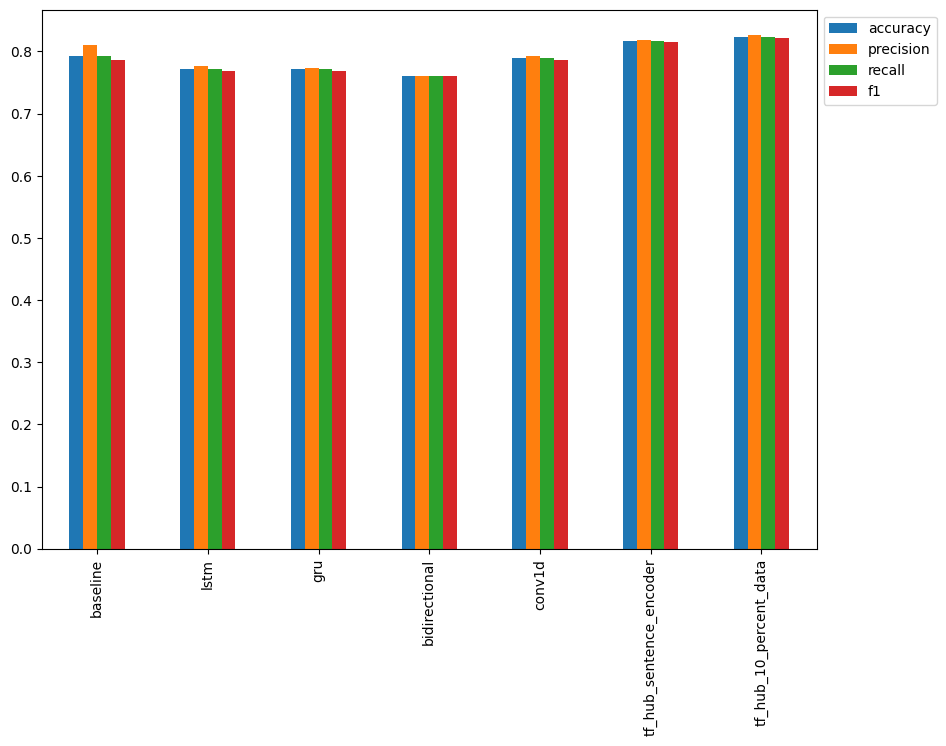

In [97]:
# Reduce the accuracy to same scale as other metrics
all_model_results["accuracy"] = all_model_results["accuracy"]/100
# Plot and compare all of the model results
all_model_results.plot(kind="bar", figsize=(10, 7)).legend(bbox_to_anchor=(1.0, 1.0));


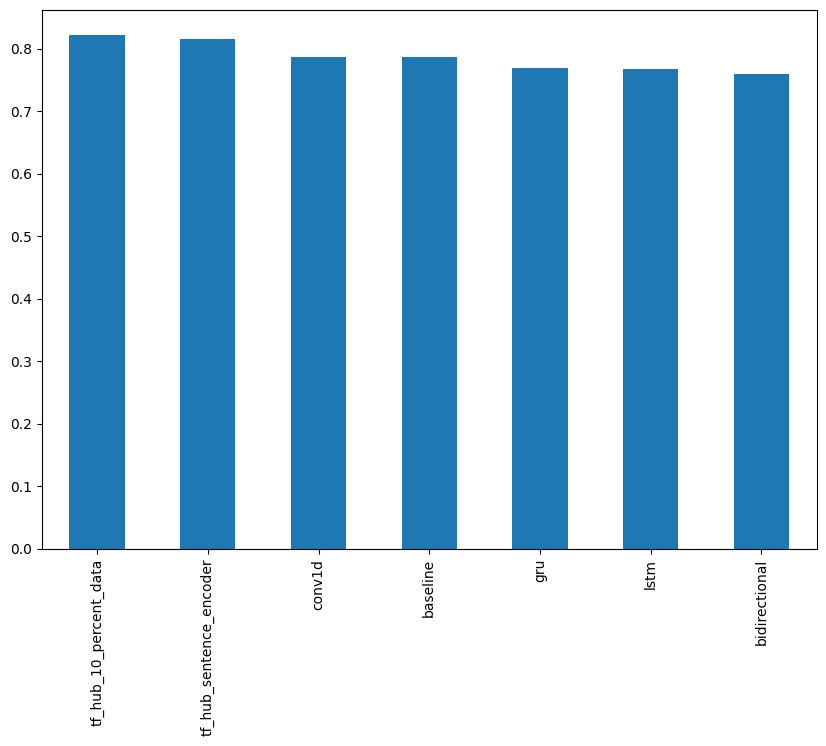

In [98]:
# Sort model results by f1-score
all_model_results.sort_values("f1", ascending=False)["f1"].plot(kind="bar", figsize=(10, 7));


## Saving and loading a trained model

There are two main formats to save a model to in TensorFlow:

1. The hdf5 file format
2. The `SavedModel` format (this is the default when using TensorFlow)

In [99]:
# Save TF Hub Sentence Encoder model to HDF5 format
model_6.save("model_6.h5")

In [100]:
# Load model with custom Hub Layer (required HDF5 format)
import tensorflow_hub as hub
loaded_model_6 = tf.keras.models.load_model("model_6.h5",
                                            custom_objects = {"KerasLayer": hub.KerasLayer})

In [101]:
# How does our loaded model perform?

loaded_model_6.evaluate(val_sentences, val_labels)

24/24 [==============================] - 2s 21ms/step - loss: 0.4295 - accuracy: 0.8163


[0.42945829033851624, 0.8162729740142822]

Now let's save to the `SavedModel` format...

In [102]:
# Save TF Hub sentence encoder model to savedmodel format

model_6.save("model_6_savedmodel_format")

In [103]:
# Load in a model from the savedmodel format

loaded_model_6_savedmodel_format = tf.keras.models.load_model("model_6_savedmodel_format")

In [104]:
# Evaluate model in savedmodel format


loaded_model_6_savedmodel_format.evaluate(val_sentences, val_labels)

24/24 [==============================] - 2s 20ms/step - loss: 0.4295 - accuracy: 0.8163


[0.42945829033851624, 0.8162729740142822]

## Finding the most wrong examples

* If our best model still isn't perfect, what examples is it getting wrong?
* And of these wrong examples which ones is it getting *most* wrong (those will prediction probabilities closest to the opposite class)

For example if a sample should have a label of 0 but our model predicts a prediction probability of 0.999 (really close to 1) and vice versa.

In [105]:
# Download a pretrained model from Google Storage

!wget https://storage.googleapis.com/ztm_tf_course/08_model_6_USE_feature_extractor.zip

!unzip 08_model_6_USE_feature_extractor.zip

--2023-06-29 10:54:33--  https://storage.googleapis.com/ztm_tf_course/08_model_6_USE_feature_extractor.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.191.128, 173.194.192.128, 209.85.145.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.191.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 960779165 (916M) [application/zip]
Saving to: ‘08_model_6_USE_feature_extractor.zip’

08_model_6_USE_feat 100%[===================>] 916.27M  38.5MB/s    in 22s     

2023-06-29 10:54:56 (41.8 MB/s) - ‘08_model_6_USE_feature_extractor.zip’ saved [960779165/960779165]

Archive:  08_model_6_USE_feature_extractor.zip
   creating: 08_model_6_USE_feature_extractor/
   creating: 08_model_6_USE_feature_extractor/assets/
   creating: 08_model_6_USE_feature_extractor/variables/
  inflating: 08_model_6_USE_feature_extractor/variables/variables.data-00000-of-00001  
  inflating: 08_model_6_USE_feature_extractor/variables/variables.

In [106]:
# Import previously trained model from Google Storage

model_6_pretrained = tf.keras.models.load_model("08_model_6_USE_feature_extractor")
model_6_pretrained.evaluate(val_sentences, val_labels)

24/24 [==============================] - 1s 11ms/step - loss: 0.4272 - accuracy: 0.8163


[0.42723119258880615, 0.8162729740142822]

In [108]:
# Make predictions with the loaded model from GS

model_6_pretrained_pred_probs = model_6_pretrained.predict(val_sentences)
model_6_pretrained_preds = tf.squeeze(tf.round(model_6_pretrained_pred_probs))
model_6_pretrained_preds[:10] # these should be in laabel format

24/24 [==============================] - 1s 10ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [111]:
# Create DataFrame with validation sentences, validation labels and best performing model prediction labels + probabilities

val_df = pd.DataFrame({"text": val_sentences,
                       "target": val_labels,
                       "pred": model_6_pretrained_preds,
                       "pred_prob": tf.squeeze(model_6_pretrained_pred_probs)})

In [112]:
val_df.head()

,text,target,pred,pred_prob
0,DFR EP016 Monthly Meltdown - On Dnbheaven 2015...,0,0.0,0.159757
1,FedEx no longer to transport bioterror germs i...,0,1.0,0.747162
2,Gunmen kill four in El Salvador bus attack: Su...,1,1.0,0.988749
3,@camilacabello97 Internally and externally scr...,1,0.0,0.196229
4,Radiation emergency #preparedness starts with ...,1,1.0,0.707808


In [115]:
# Find the wrong predictions and sort by prediction probabilities

most_wrong = val_df[val_df["target"] != val_df["pred"]].sort_values("pred_prob", ascending = False)
most_wrong[:10]

,text,target,pred,pred_prob
31,? High Skies - Burning Buildings ? http://t.co...,0,1.0,0.910196
759,FedEx will no longer transport bioterror patho...,0,1.0,0.876982
628,@noah_anyname That's where the concentration c...,0,1.0,0.852300
209,Ashes 2015: AustraliaÛªs collapse at Trent Br...,0,1.0,0.835455
251,@AshGhebranious civil rights continued in the ...,0,1.0,0.827213
393,@SonofLiberty357 all illuminated by the bright...,0,1.0,0.814816
109,[55436] 1950 LIONEL TRAINS SMOKE LOCOMOTIVES W...,0,1.0,0.810840
49,@madonnamking RSPCA site multiple 7 story high...,0,1.0,0.803122
119,@freefromwolves GodsLove &amp; #thankU brother...,0,1.0,0.766901
344,Air Group is here to the rescue! We have 24/7 ...,0,1.0,0.766625


In [116]:
most_wrong.tail()

,text,target,pred,pred_prob
411,@SoonerMagic_ I mean I'm a fan but I don't nee...,1,0.0,0.043918
233,I get to smoke my shit in peace,1,0.0,0.042087
38,Why are you deluged with low self-image? Take ...,1,0.0,0.038998
244,Reddit Will Now QuarantineÛ_ http://t.co/pkUA...,1,0.0,0.038949
23,Ron &amp; Fez - Dave's High School Crush https...,1,0.0,0.037186


Let's remind ourselves of the target labels...
* `0` = not disaster
* `1` = disaster

In [118]:
# Check to false positives (modeol predicted 1 when should've been 0)

for row in most_wrong[:10].itertuples():
  _, text, target, pred, pred_prob = row

  print(f"Target: {target}, Pred: {pred}, Prob: {pred_prob}")
  print(f"Text:\n{text}\n")
  print("-----\n")

Target: 0, Pred: 1.0, Prob: 0.9101957082748413
Text:
? High Skies - Burning Buildings ? http://t.co/uVq41i3Kx2 #nowplaying

-----

Target: 0, Pred: 1.0, Prob: 0.8769820332527161
Text:
FedEx will no longer transport bioterror pathogens in wake of anthrax lab mishaps http://t.co/lHpgxc4b8J

-----

Target: 0, Pred: 1.0, Prob: 0.8523001670837402
Text:
@noah_anyname That's where the concentration camps and mass murder come in. 
 
EVERY. FUCKING. TIME.

-----

Target: 0, Pred: 1.0, Prob: 0.835454523563385
Text:
Ashes 2015: AustraliaÛªs collapse at Trent Bridge among worst in history: England bundled out Australia for 60 ... http://t.co/t5TrhjUAU0

-----

Target: 0, Pred: 1.0, Prob: 0.8272131681442261
Text:
@AshGhebranious civil rights continued in the 60s. And what about trans-generational trauma? if anything we should listen to the Americans.

-----

Target: 0, Pred: 1.0, Prob: 0.8148159384727478
Text:
@SonofLiberty357 all illuminated by the brightly burning buildings all around the town!


In [120]:
# Check to false negatives (modeol predicted 0 when should've been 1)

for row in most_wrong[-10:].itertuples():
  _, text, target, pred, pred_prob = row

  print(f"Target: {target}, Pred: {pred}, Prob: {pred_prob}")
  print(f"Text:\n{text}\n")
  print("-----\n")

Target: 1, Pred: 0.0, Prob: 0.06730345636606216
Text:
@DavidVonderhaar At least you were sincere ??

-----

Target: 1, Pred: 0.0, Prob: 0.05507584661245346
Text:
@willienelson We need help! Horses will die!Please RT &amp; sign petition!Take a stand &amp; be a voice for them! #gilbert23 https://t.co/e8dl1lNCVu

-----

Target: 1, Pred: 0.0, Prob: 0.05460338667035103
Text:
Lucas Duda is Ghost Rider. Not the Nic Cage version but an actual 'engulfed in flames' badass. #Mets

-----

Target: 1, Pred: 0.0, Prob: 0.054596997797489166
Text:
going to redo my nails and watch behind the scenes of desolation of smaug ayyy

-----

Target: 1, Pred: 0.0, Prob: 0.04963729530572891
Text:
You can never escape me. Bullets don't harm me. Nothing harms me. But I know pain. I know pain. Sometimes I share it. With someone like you.

-----

Target: 1, Pred: 0.0, Prob: 0.04391849786043167
Text:
@SoonerMagic_ I mean I'm a fan but I don't need a girl sounding off like a damn siren

-----

Target: 1, Pred: 0.0, Pro

## Making predictions on the test dataset


In [121]:
# Making predictions on the test dataset and visualizing them

test_sentences = test_df["text"].to_list()
test_samples = random.sample(test_sentences, 10)

for test_sample in test_samples:
  pred_prob = tf.squeeze(model_6_pretrained.predict([test_sample])) # our model expects a list as input
  pred = tf.round(pred_prob)
  print(f"Pred: {int(pred)}, Prob: {pred_prob}")
  print(f"Text:\n{test_sample}\n")
  print("--------\n")

1/1 [==============================] - 0s 91ms/step
Pred: 0, Prob: 0.3395684063434601
Text:
@RosanneBarr New documents suggest Clinton's email server may have crashed. All of her fan mail from Qatar must have crashed it.

--------

1/1 [==============================] - 0s 67ms/step
Pred: 0, Prob: 0.10288365930318832
Text:
Oh I see we are now tied?  Sweet!  It's all in the Blizzard

--------

1/1 [==============================] - 0s 81ms/step
Pred: 0, Prob: 0.48184821009635925
Text:
#MicrosoftÛªs #Nokia acquisition was an even bigger #disaster than we ever imagined http://t.co/CV0mrisFt3

--------

1/1 [==============================] - 0s 155ms/step
Pred: 1, Prob: 0.9706084728240967
Text:
Pic of 16yr old PKK suicide bomber who detonated bomb in Turkey Army trench released: Harun Ìàekdar a member o... http://t.co/fMoqK26hIm

--------

1/1 [==============================] - 0s 134ms/step
Pred: 1, Prob: 0.9833022356033325
Text:
Sinjar Massacre Yazidis Blast Lack of Action Over Hostages

## Your challenge... predicting on Tweets from the wild

Go to your favourite Twitter account and copy one of their latest Tweets.

Then pass that Tweet through our trained model.

Is that Tweet a disaster or not disaster (according to the model)? Is the model right or wrong?

## The speed/score tradeoff

In [122]:
# Let's make a function to measure the time of prediction

import time

def pred_timer(model, samples):
  """
  Times how long a model takes to make predictions on samples.
  """

  start_time = time.perf_counter() # get start time
  model.predict(samples) # make predictions
  end_time = time.perf_counter() # get finish time
  total_time = end_time-start_time # calculate how long predictions took to make
  time_per_pred = total_time/len(samples)
  return total_time, time_per_pred

In [124]:
# Calculate TF Hub Sentence Encoder time per pred

model_6_total_pred_time, model_6_time_per_pred = pred_timer(model_6_pretrained,val_sentences)


24/24 [==============================] - 0s 18ms/step


In [125]:
model_6_total_pred_time, model_6_time_per_pred

(0.5589856249998775, 0.0007335769356953773)

In [126]:
baseline_total_pred_time, baseline_time_per_pred = pred_timer(model_0,val_sentences)


In [127]:
baseline_total_pred_time, baseline_time_per_pred

(0.12313580899990484, 0.00016159554986864153)

In [128]:
# Get results for pretrained GS model
model_6_pretrained_results = calculate_results(y_true =val_labels,
                                               y_pred=model_6_pretrained_preds)

Text(0, 0.5, 'F1-score')

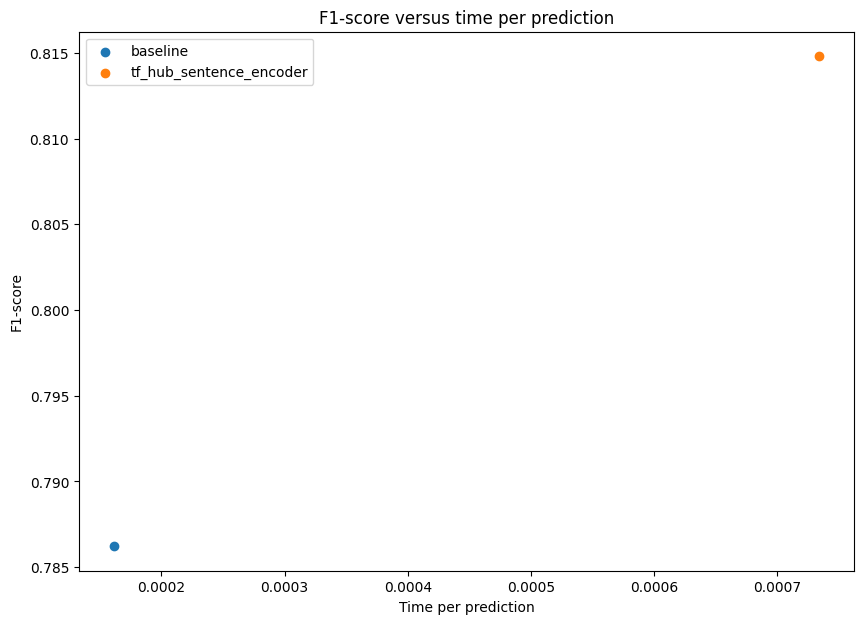

In [131]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
plt.scatter(baseline_time_per_pred, baseline_results["f1"], label="baseline")
plt.scatter(model_6_time_per_pred, model_6_pretrained_results["f1"], label="tf_hub_sentence_encoder")
plt.legend()
plt.title("F1-score versus time per prediction")
plt.xlabel("Time per prediction")
plt.ylabel("F1-score")